In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [ ]:
x_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/43_x.csv',names=['x1','x2','x3','x4','x5'], header=None)
y_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/43_y.csv', names = ['Y'], header=None)

In [ ]:
tempx1 = x_dataset.loc[:,'x1']

In [ ]:
y_dataset

,Y
0,-102.214658
1,75.891933
2,-48.935297
3,32.248063
4,81.521642
...,...
434,-42.135898
435,12.348306
436,22.319608
437,-0.762952


In [ ]:
#Details of the data
print("First dataset: ", x_dataset.shape,"\nSecond dataset:", y_dataset.shape)


First dataset:  (439, 5) 
Second dataset: (439, 1)


In [ ]:
#Stat for each dataset 
print("First dataset")
x_dataset.describe()


First dataset


,x1,x2,x3,x4,x5
count,439.000000,439.000000,439.000000,439.000000,439.000000
mean,-0.001895,0.024772,0.021792,0.008499,0.007221
std,0.993599,0.990176,0.978510,0.956523,0.958674
min,-2.910912,-3.242491,-2.614562,-3.242670,-3.053636
25%,-0.624972,-0.573845,-0.679706,-0.627835,-0.657760
50%,-0.035735,0.026633,0.073730,0.025234,0.034743
75%,0.639162,0.659469,0.668136,0.656609,0.609682
max,2.938254,3.943473,3.334179,2.821692,2.852971


In [ ]:
print("Second dataset: ")
y_dataset.describe()

Second dataset: 


,Y
count,439.000000
mean,-0.711303
std,72.863726
min,-232.979025
25%,-46.929955
50%,0.890339
75%,44.985009
max,229.464650


In [ ]:
#Correlation

x_dataset.corr()

,x1,x2,x3,x4,x5
x1,1.000000,-0.070400,-0.019526,0.073702,-0.015328
x2,-0.070400,1.000000,-0.021846,0.069707,-0.027739
x3,-0.019526,-0.021846,1.000000,0.118073,0.019718
x4,0.073702,0.069707,0.118073,1.000000,0.042422
x5,-0.015328,-0.027739,0.019718,0.042422,1.000000


In [ ]:
#Correlation

y_dataset.corr()

,Y
Y,1.0


In [ ]:
x_dataset.head()

,,x1,x2,x3,x4,x5
-1.995943,-0.005557,-0.455933,0.947454,-0.036117,-0.913156,0.390506
0.596229,0.090338,0.618510,0.662950,0.155962,0.074884,0.551299
-0.871191,-0.629453,0.231108,0.662197,-0.043200,0.580811,-0.428146
-0.546103,-1.934072,0.830076,0.838911,1.518476,0.413764,0.720049
-0.896869,1.672221,1.035752,0.917323,0.702790,1.684162,2.119479


In [ ]:
reg = LinearRegression() #создаем модель
reg.fit(pd.DataFrame(tempx1), y_dataset) #Обучение

LinearRegression()

In [ ]:
reg = linear_model.LinearRegression() #создаем модель
reg.fit(x_dataset, y_dataset) #Обучение

LinearRegression()

In [ ]:
print('Коэффициенты: ', reg.coef_)
print('Свободный член: ', reg.intercept_)

Коэффициенты:  [[31.70379424  1.37142802 42.40605084 -1.42816072  8.95253429]]
Свободный член:  [-1.66181123]


In [ ]:
print('Предсказали: \n', reg.predict(pd.DataFrame(tempx1).iloc[0:5]),"\n")
print('Реально: \n', y_dataset.iloc[0:5])

Предсказали: 
 [[-14.58597016]
 [ 18.24728562]
 [  6.40891787]
 [ 24.71241099]
 [ 30.99755472]] 

Реально: 
             Y
0 -102.214658
1   75.891933
2  -48.935297
3   32.248063
4   81.521642


In [ ]:
print('Предсказали: \n', reg.predict(x_dataset.iloc[0:5]))
print('Реально: \n', y_dataset.iloc[0:5])

Предсказали: 
 [[-1.15486613e+01]
 [ 3.02988059e+01]
 [ 7.89330954e-02]
 [ 9.60531423e+01]
 [ 7.88054882e+01]]
Реально: 
             Y
0 -102.214658
1   75.891933
2  -48.935297
3   32.248063
4   81.521642


In [ ]:
Ymod =-0.65338473 + 30.55841059 * tempx1
Ymod

-1.995943  -0.005557   -14.585970
 0.596229   0.090338    18.247286
-0.871191  -0.629453     6.408918
-0.546103  -1.934072    24.712411
-0.896869   1.672221    30.997555
                          ...    
-0.845199   1.031390    -5.944787
-0.768219  -0.363142    52.373645
-0.663701   1.236958    15.848736
-0.357691   0.889148    -4.579006
 0.281234   0.739775    -8.805035
Name: x1, Length: 439, dtype: float64

In [ ]:
# Devide datasets

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=123)

In [ ]:
reg2 = LinearRegression().fit(x_train, y_train) #создали и обучили

In [ ]:
print('Коэффициенты: ', reg2.coef_)
print('Свободный член: ', reg2.intercept_)

Коэффициенты:  [[34.01993484  1.64206522 43.8037322  -1.41746663  5.99586158]]
Свободный член:  [-1.18502197]


In [ ]:
#оценка 
print('Модель, которая обучалась на 80% выборки: ', reg2.score(x_test, y_test))
#вторая оценка для сравнения
print('Модель, которая обучалась на всей выборке: ', reg.score(x_test, y_test))


Модель, которая обучалась на 80% выборки:  0.3894941696082955
Модель, которая обучалась на всей выборке:  0.4150399291774821


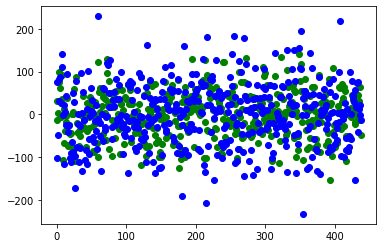

In [ ]:
plt.figure()
plt.scatter(np.arange(0, len(x_dataset), 1), reg2.predict(x_dataset), color='g') #предсказано
plt.scatter(np.arange(0, len(x_dataset), 1), y_dataset, color='b') #реальные данные
plt.show()

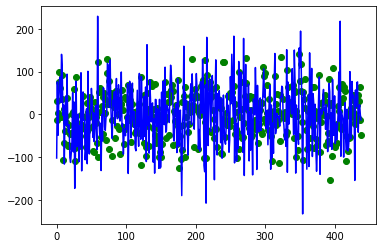

In [ ]:
plt.figure()
plt.scatter(np.arange(0, len(x_dataset), 1), reg2.predict(x_dataset), color='g') #предсказано
plt.plot(np.arange(0, len(x_dataset), 1), y_dataset, color='b') #реальные данные
plt.show()

In [ ]:
#посмотрим конкретные примеры предсказания, убедимся, что точность довольно-таки низкая
print('Реально: ', y_dataset.iloc[0:5])
print('Предсказано: ', reg2.predict(x_dataset.iloc[0:5]))

Реально:              Y
0 -102.214658
1   75.891933
2  -48.935297
3   32.248063
4   81.521642
Предсказано:  [[-13.08630254]
 [ 30.9763457 ]
 [  2.48193626]
 [ 98.67736552]
 [ 76.66316849]]


Score:  0.09687766082593596
Коэффициент:  [[31.42655744]]


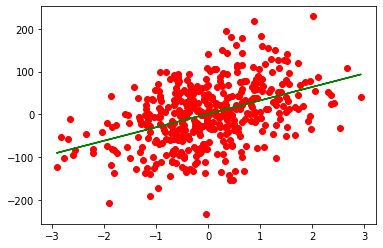

Примеры предсказания:
      Реально  Предсказано
0 -102.214658   -13.180766
1   75.891933    20.585263
2  -48.935297     8.410575
3   32.248063    27.234059
4   81.521642    33.697760




Score:  -0.010171969066191
Коэффициент:  [[-0.57848088]]


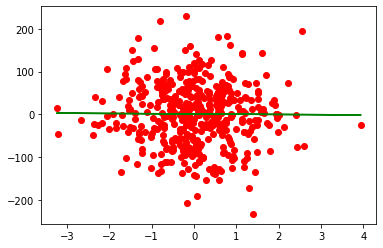

Примеры предсказания:
      Реально  Предсказано
0 -102.214658     0.343563
1   75.891933     0.508143
2  -48.935297     0.508579
3   32.248063     0.406353
4   81.521642     0.360993




Score:  0.32298414489824
Коэффициент:  [[41.69761647]]


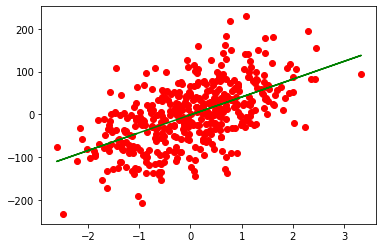

Примеры предсказания:
      Реально  Предсказано
0 -102.214658    -2.734613
1   75.891933     5.274623
2  -48.935297    -3.029971
3   32.248063    62.088178
4   81.521642    28.076014




Score:  -0.022830066673454885
Коэффициент:  [[8.30187454]]


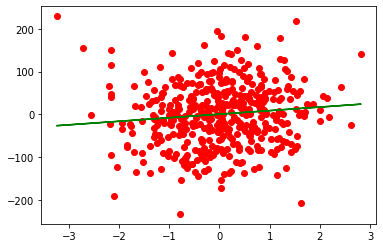

Примеры предсказания:
      Реально  Предсказано
0 -102.214658    -7.215954
1   75.891933     0.986630
2  -48.935297     5.186779
3   32.248063     3.799974
4   81.521642    14.346658




Score:  0.021046252883840544
Коэффициент:  [[7.43912727]]


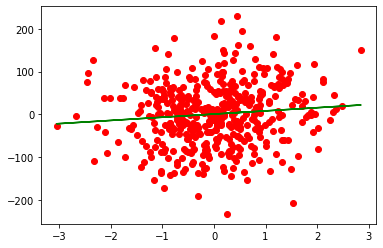

Примеры предсказания:
      Реально  Предсказано
0 -102.214658     3.540967
1   75.891933     4.737129
2  -48.935297    -2.549087
3   32.248063     5.992481
4   81.521642    16.403018






In [ ]:
regs_list = [] #здесь будем хранить все парные регрессии (4 всего)

#в цикле проходимся по каждому столбцу обучающей выборки для построения парной регресии (с целевым признаком)
for col in x_train.columns:
    #print('ПО СТОЛБЦУ НОМЕР: ', col + 1, 'из 4')
    new_reg = linear_model.LinearRegression().fit(x_train[col].values.reshape((-1, 1)), y_train) #создали модель
    print('Score: ', new_reg.score(x_test[col].values.reshape((-1,1)), y_test)) #выводим score на тестовой выборке
    print('Коэффициент: ', new_reg.coef_)
    regs_list.append(new_reg) #сохраняем в список модель
    
    plt.figure() #строим график
    plt.scatter(x_dataset[col], y_dataset, color='r') #реальные данные
    plt.plot(x_dataset[col], new_reg.predict(x_dataset[col].values.reshape((-1, 1))), color='g') #предсказанные
    plt.show()
    
    #парочка примеров с предсказанием для наглядности
    print('Примеры предсказания:')
    empt_data = {'Реально':[],
                'Предсказано':[]}
    some_exmpl = pd.DataFrame(empt_data, columns = ['Реально', 'Предсказано'])
    some_exmpl['Реально'] = y_dataset[0:5]
    some_exmpl['Предсказано'] = new_reg.predict(x_dataset[col].iloc[0:5].values.reshape((-1,1)))
    print(some_exmpl)
    
    print('\n\n\n')

Мы видим, что ни одна из парных регрессий, представленных выше, не справляется со своей задачей на должном уровне. Об этом говорит низкий score(), большой разброс точек с реальными данными относительно прямой предсказания, большой промах по предсказанным значениям на конкретных примерах. Множественная регрессия (та, что выше) справляется намного лучше.

ВТОРОГО ПОРЯДКА
score()= 0.09684252933350712 
коэффициенты= [[0.00000000e+00 3.14280859e+01 7.70602757e-03]] 
свободный= [1.13981573]


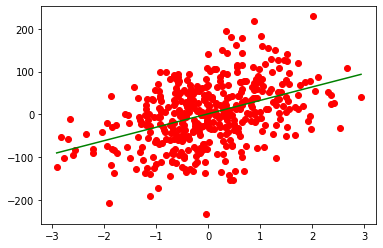

ТРЕТЬЕГО ПОРЯДКА
score()= 0.10524381839331709 
коэффициенты= [[ 0.         36.63574773 -0.93271514 -1.68022637]] 
свободный= [1.78658225]


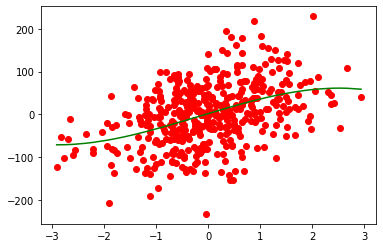

ДЕСЯТОГО ПОРЯДКА
score()= 0.023233361137232955 
коэффициенты= [[ 0.00000000e+00  3.40488904e+01  4.25608888e+01  7.21034308e+00
  -2.27195661e+01 -5.05986077e+00  2.69089164e+00  8.12412983e-01
   1.24550741e-01 -3.56008854e-02 -2.26313283e-02]] 
свободный= [-8.94079887]


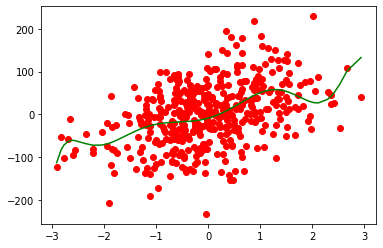





ВТОРОГО ПОРЯДКА
score()= -0.016244424917792877 
коэффициенты= [[ 0.         -0.37566569  1.68740811]] 
свободный= [-0.65230023]


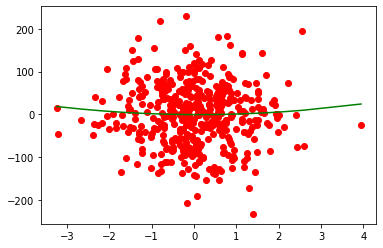

ТРЕТЬЕГО ПОРЯДКА
score()= -0.04605082901418589 
коэффициенты= [[ 0.         -4.5062939   2.14668084  1.46094829]] 
свободный= [-0.86509601]


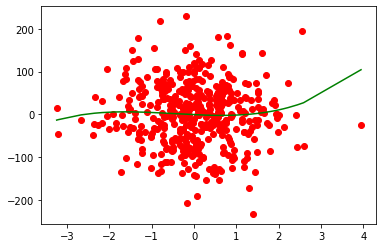

ДЕСЯТОГО ПОРЯДКА
score()= -50.98969895554745 
коэффициенты= [[ 0.00000000e+00  1.87709327e+01  3.18502577e+01 -3.00681493e+01
  -1.87446226e+01  1.00789145e+01  4.17558305e+00 -1.02853805e+00
  -3.52980004e-01  2.35223476e-02  6.67311211e-03]] 
свободный= [-8.09258279]


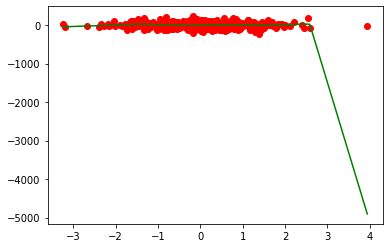





ВТОРОГО ПОРЯДКА
score()= 0.31357447465129107 
коэффициенты= [[ 0.         42.06728062 -2.07846018]] 
свободный= [0.71905824]


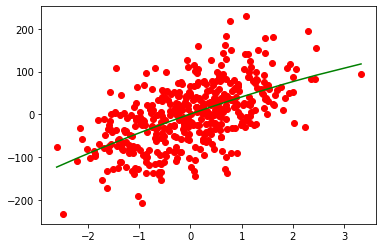

ТРЕТЬЕГО ПОРЯДКА
score()= 0.3139208473552567 
коэффициенты= [[ 0.00000000e+00  4.21594213e+01 -2.05120728e+00 -3.66020281e-02]] 
свободный= [0.69650554]


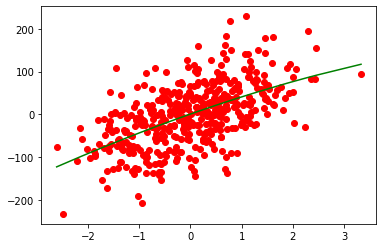

ДЕСЯТОГО ПОРЯДКА
score()= 0.11885240690707344 
коэффициенты= [[  0.          41.42539659 -34.76854297   7.34379547  47.44845633
   -3.17904736 -20.55567797  -0.32772941   3.43847544   0.13051294
   -0.19969699]] 
свободный= [2.71902722]


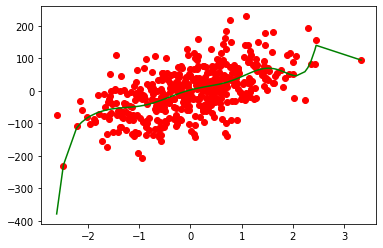





ВТОРОГО ПОРЯДКА
score()= -6.20259007644286e-05 
коэффициенты= [[0.         8.2602965  1.70038734]] 
свободный= [-1.18125592]


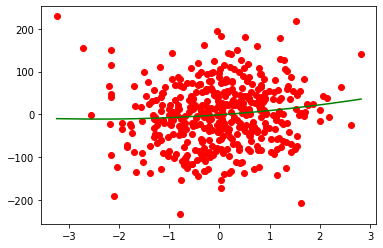

ТРЕТЬЕГО ПОРЯДКА
score()= 0.04441920990673254 
коэффициенты= [[ 0.         12.18173174  1.85778168 -1.50118803]] 
свободный= [-1.45042032]


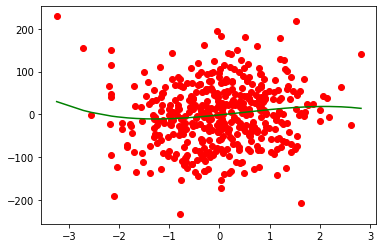

ДЕСЯТОГО ПОРЯДКА
score()= -18.431828873666365 
коэффициенты= [[  0.          32.33074983   0.75718832 -51.58342803  -0.5111192
   31.26133225  -2.45148631  -6.70097277   0.84730177   0.44547839
   -0.06396596]] 
свободный= [1.38916431]


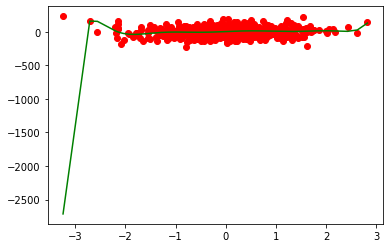





ВТОРОГО ПОРЯДКА
score()= 0.0076481079970839305 
коэффициенты= [[0.         6.28878051 5.69073641]] 
свободный= [-4.51827728]


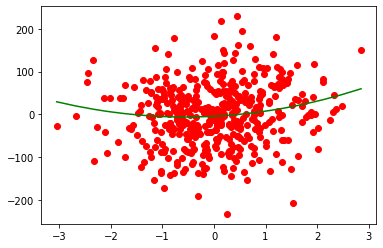

ТРЕТЬЕГО ПОРЯДКА
score()= 0.0036622810716532284 
коэффициенты= [[ 0.          9.52037229  5.99859312 -1.20083823]] 
свободный= [-4.64862512]


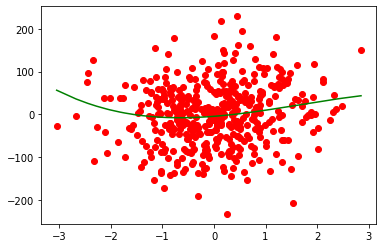

ДЕСЯТОГО ПОРЯДКА
score()= -12.929928859657695 
коэффициенты= [[  0.          18.83531482  35.44092675 -14.62232155 -32.19559006
    4.52316229  12.04319859  -0.10303404  -2.07545183  -0.06470483
    0.14044782]] 
свободный= [-7.98493557]


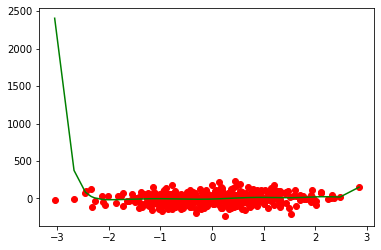

In [ ]:
#снова проходимся по всем нецелевым признакам для полинома
#будем сразу строить всех трех порядков за одну итерацию

for col in x_train.columns:
    poly2 = PolynomialFeatures(degree = 2)
    poly3 = PolynomialFeatures(degree = 3)
    poly10 = PolynomialFeatures(degree = 10)
    
    x_poly2 = poly2.fit_transform(x_train[col].values.reshape((-1, 1))) #полином 2-ого порядка
    new_reg2 = linear_model.LinearRegression().fit(x_poly2, y_train)
    
    x_poly3 = poly3.fit_transform(x_train[col].values.reshape((-1, 1))) #полином 3-ого порядка
    new_reg3 = linear_model.LinearRegression().fit(x_poly3, y_train)
    
    x_poly10 = poly10.fit_transform(x_train[col].values.reshape((-1, 1))) #полином 10-ого порядка
    new_reg10 = linear_model.LinearRegression().fit(x_poly10, y_train)
    
    #что по кэфам и score()? + графики
    print('ВТОРОГО ПОРЯДКА\nscore()=',new_reg2.score(poly2.fit_transform(x_test[col].values.reshape((-1, 1))), y_test), '\nкоэффициенты=', new_reg2.coef_, '\nсвободный=', new_reg2.intercept_)
    plt.figure()
    plt.scatter(x_dataset[col], y_dataset, color='r')
    plt.plot(x_dataset[col].sort_values(), new_reg2.predict(poly2.fit_transform(x_dataset[col].sort_values().values.reshape((-1, 1)))), color='g')
    plt.show()
    
    print('ТРЕТЬЕГО ПОРЯДКА\nscore()=',new_reg3.score(poly3.fit_transform(x_test[col].values.reshape((-1, 1))), y_test), '\nкоэффициенты=', new_reg3.coef_, '\nсвободный=', new_reg3.intercept_)
    plt.figure()
    plt.scatter(x_dataset[col], y_dataset, color='r')
    plt.plot(x_dataset[col].sort_values(), new_reg3.predict(poly3.fit_transform(x_dataset[col].sort_values().values.reshape((-1, 1)))), color='g')
    plt.show()
    
    print('ДЕСЯТОГО ПОРЯДКА\nscore()=',new_reg10.score(poly10.fit_transform(x_test[col].values.reshape((-1, 1))), y_test), '\nкоэффициенты=', new_reg10.coef_, '\nсвободный=', new_reg10.intercept_)
    plt.figure()
    plt.scatter(x_dataset[col], y_dataset, color='r')
    plt.plot(x_dataset[col].sort_values(), new_reg10.predict(poly10.fit_transform(x_dataset[col].sort_values().values.reshape((-1, 1)))), color='g')
    plt.show()
    
    print('\n\n\n')

Какой можно сделать вывод про полиномиальные регрессии?
Она, так же как и парная регрессия, просто неконкурентноспособна по сравнению со множественной регрессией. Score() довольно мал даже у регрессии 10-ого порядка. Из всей работы очень просто сделать вывод - множественная регрессия является лучшим решением, т.к. все нецелевые признаки в своей совокупности оказывают влияние на целевой признак, и это нельзя не учитывать.
Однако данный вывод делается конкретно для этого случая, т.е. для данной выборки. Ведь в этом и есть наша работа - подобрать такую регрессию, которая сможет наиболее точно выполнять предиктивные функции.